<a href="https://colab.research.google.com/github/marlete-silva/Flip_Exemplo/blob/main/ProjetoFinalMarlete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB  # For Gaussian Naive Bayes
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # Import all three
#from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import seaborn as sns


In [9]:
df = pd.read_csv('/content/drive/MyDrive/iris.data')



In [10]:
df.shape

(150, 5)

In [11]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [14]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# limpar os dados caso seja multiplicados

>



In [15]:
df.drop_duplicates(inplace= True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


In [17]:
import pandas as pd

pd.Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'species'],
      dtype='object')

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'species'],
      dtype='object')

In [18]:
df.index

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       139, 140, 141, 143, 144, 145, 146, 147, 148, 149],
      dtype='int64', length=147)

In [19]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [20]:
import matplotlib.pyplot as plt # Importing the matplotlib.pyplot module and aliasing it as plt


In [21]:
plt.show()

In [22]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [23]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [24]:
df.describe(include= 'all').round(2)

,sepal_length,sepal_width,petal_length,petal_width,species
count,147.00,147.00,147.00,147.00,147
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-versicolor
freq,NaN,NaN,NaN,NaN,50
mean,5.86,3.06,3.78,1.21,NaN
std,0.83,0.44,1.76,0.76,NaN
min,4.30,2.00,1.00,0.10,NaN
25%,5.10,2.80,1.60,0.30,NaN
50%,5.80,3.00,4.40,1.30,NaN
75%,6.40,3.30,5.10,1.80,NaN


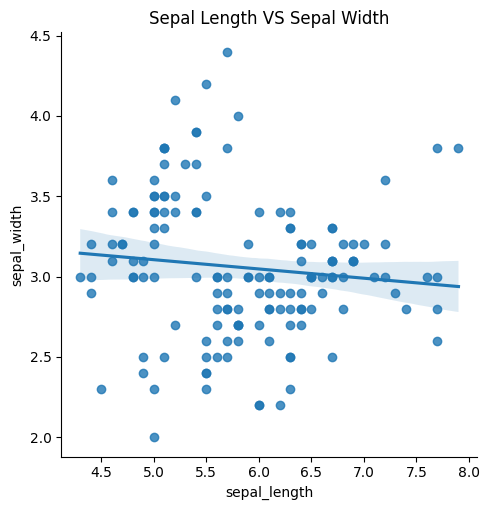

In [25]:
sns.lmplot(
    x="sepal_length",
    y="sepal_width",
    palette="bright",
    data=df
)

plt.title("Sepal Length VS Sepal Width")
plt.show()


In [27]:
df.isna().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [28]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in sepal_length is 35
No. of unique values in sepal_width is 23
No. of unique values in petal_length is 43
No. of unique values in petal_width is 22
No. of unique values in species is 3


In [29]:
colors = ['red', 'yellow', 'green']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [30]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [37]:
#treinamento
x=df.drop(columns=['species'], axis=1)
y=df['species']

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3)

In [39]:
#checando a distribuição dos valores das classes
y_train.value_counts()

,count
species,
Iris-setosa,36
Iris-versicolor,33
Iris-virginica,33


In [62]:
#implementação do modelo com as métricas para validação
def evaluate_model(model, x_train, x_test, y_train, y_test):

    # Fit do modelo para o treinamento de dados
    model.fit(x_train, y_train)

    # fazer a predição nos dados
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    # calculo da matriz de confusão
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(11,4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    # relatório geral das classificações
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Relatorio de Classificação:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")

    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, F1_train, F1_test ]
    return model_score

In [63]:
#criar o score
score = pd.DataFrame(index = ['Precision Train', 'Precision Test','Recall Train','Recall Test','Accuracy Train', 'Accuracy Test', 'F1 macro Train', 'F1 macro Test'])


In [64]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=20)

In [65]:
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=20)


Confusion Matrix:


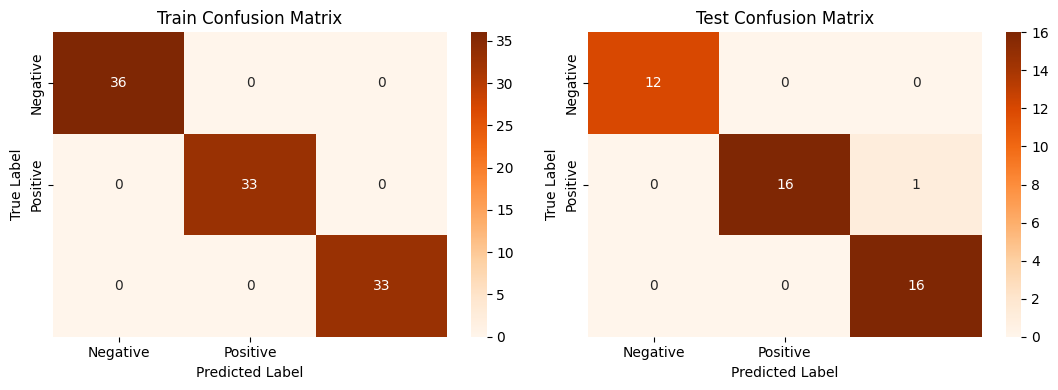


Train Relatorio de Classificação:
|                 |   precision |   recall |   f1-score |   support |
|:----------------|------------:|---------:|-----------:|----------:|
| Iris-setosa     |           1 |        1 |          1 |        36 |
| Iris-versicolor |           1 |        1 |          1 |        33 |
| Iris-virginica  |           1 |        1 |          1 |        33 |
| accuracy        |           1 |        1 |          1 |         1 |
| macro avg       |           1 |        1 |          1 |       102 |
| weighted avg    |           1 |        1 |          1 |       102 |

Test Classification Report:
|                 |   precision |   recall |   f1-score |   support |
|:----------------|------------:|---------:|-----------:|----------:|
| Iris-setosa     |    1        | 1        |   1        | 12        |
| Iris-versicolor |    1        | 0.941176 |   0.969697 | 17        |
| Iris-virginica  |    0.941176 | 1        |   0.969697 | 16        |
| accuracy        |    0.9

In [73]:
score_rf_model = evaluate_model(rf_model, x_train, x_test, y_train, y_test)


In [74]:
#svm
svm_model = SVC(kernel='linear', random_state=0, probability=True)



Confusion Matrix:


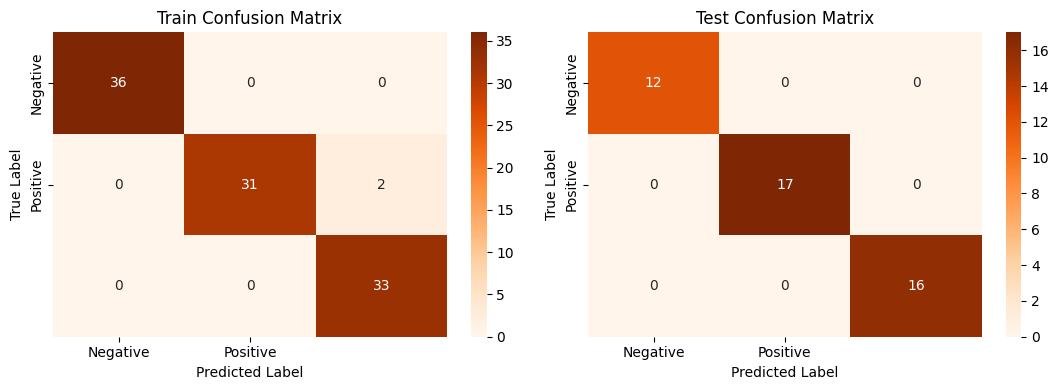


Train Relatorio de Classificação:
|                 |   precision |   recall |   f1-score |    support |
|:----------------|------------:|---------:|-----------:|-----------:|
| Iris-setosa     |    1        | 1        |   1        |  36        |
| Iris-versicolor |    1        | 0.939394 |   0.96875  |  33        |
| Iris-virginica  |    0.942857 | 1        |   0.970588 |  33        |
| accuracy        |    0.980392 | 0.980392 |   0.980392 |   0.980392 |
| macro avg       |    0.980952 | 0.979798 |   0.979779 | 102        |
| weighted avg    |    0.981513 | 0.980392 |   0.980374 | 102        |

Test Classification Report:
|                 |   precision |   recall |   f1-score |   support |
|:----------------|------------:|---------:|-----------:|----------:|
| Iris-setosa     |           1 |        1 |          1 |        12 |
| Iris-versicolor |           1 |        1 |          1 |        17 |
| Iris-virginica  |           1 |        1 |          1 |        16 |
| accuracy        

In [75]:
svm_score = evaluate_model(svm_model, x_train, x_test, y_train, y_test)

In [94]:
#naive Bayes
nb_model = GaussianNB()

In [110]:
nb_model.fit(x_train, y_train)

# 3. Evaluate the model
evaluate_model(nb_model, x_train, x_test, y_train, y_test)

In [111]:
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# ... (Your existing evaluate_model function) ...

# 1. Create a Naive Bayes model
nb_model = GaussianNB()

# 2. Train the model
nb_model.fit(x_train, y_train)

# 3. Evaluate the model and display results
evaluate_model(nb_model, x_train, x_test, y_train, y_test)